# KNN实现回归

跟2.1类似，这里不过多介绍。

主要思路：这里选择前三个特征作为X，最后一个特征作为y，用X预测y。预测某一点t, 使用t的k个邻居的y值，用加权法得到t的y值。 

In [2]:
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv('\data\Iris.csv')
data.drop(['Id', 'Species'], inplace = True, axis = 1)
data.drop_duplicates(inplace = True)

In [9]:
data.shape

(147, 4)

In [41]:
class KNN:
    
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        X = np.asarray(X)
        result = []
        
        for x in X:
            dis = np.sqrt( np.sum((x-self.X) ** 2, axis=1))
            index = dis.argsort()
            index = index[ :self.k]
            result.append(np.mean(self.y[index]))
        return np.asarray(result)
    
    def predict2(self, X):
        """ 考虑权重"""
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt( np.sum((x-self.X) ** 2, axis=1))
            index = dis.argsort()
            index = index[ :self.k]
            s = np.sum(1/(dis[index]+0.001)) #+0.001是避免距离为0
            weight = (1/(dis[index]+0.001) ) / s
            
            result.append(np.sum(self.y[index] * weight))                       
        return np.asarray(result)
    

In [31]:
t = data.sample(len(data), random_state =0)
t.shape

(147, 4)

In [32]:
train_X = t.iloc[:120, :-1]
train_y = t.iloc[:120, -1]
test_X = t.iloc[120:, :-1]
test_y = t.iloc[120:, -1]

In [43]:
knn = KNN(k=3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
display(result)
display(test_y.values)
np.mean((result - test_y)**2)

array([1.33333333, 2.        , 1.2       , 1.26666667, 1.93333333,
       1.16666667, 2.16666667, 0.36666667, 1.9       , 1.4       ,
       1.2       , 0.16666667, 1.93333333, 2.26666667, 1.73333333,
       0.13333333, 1.03333333, 1.3       , 1.83333333, 1.23333333,
       0.16666667, 0.23333333, 0.16666667, 2.03333333, 1.2       ,
       1.8       , 0.2       ])

array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

0.04185185185185184

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

<function matplotlib.pyplot.show(close=None, block=None)>

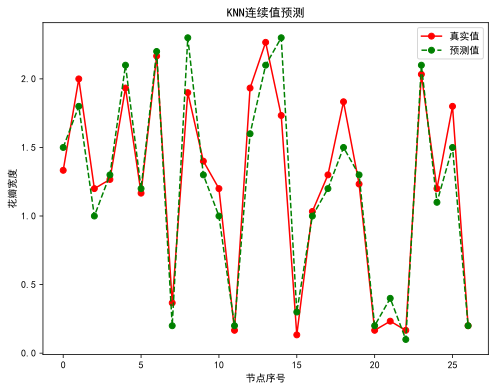

In [40]:
plt.figure(figsize =(8,6) ) 
plt.plot(result, 'ro-', label='真实值')
plt.plot(test_y.values, 'go--', label='预测值')
plt.title('KNN连续值预测')
plt.xlabel('节点序号')
plt.ylabel('花瓣宽度')
plt.legend()
plt.show()

In [44]:
#带权重的
knn = KNN(k=3)
knn.fit(train_X, train_y)
result = knn.predict2(test_X)
display(result)
display(test_y.values)
np.mean((result - test_y)**2)

array([1.35403914, 2.04006363, 1.15554454, 1.26331758, 2.19561371,
       1.16336566, 2.12379092, 0.36949954, 1.8875467 , 1.38365514,
       1.20794491, 0.17165102, 1.97672615, 2.23590685, 1.6765125 ,
       0.13817472, 1.02222047, 1.3       , 1.85536796, 1.23015903,
       0.17293278, 0.24368835, 0.17098366, 2.01556952, 1.1879292 ,
       1.82278521, 0.2       ])

array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

0.0458106555834361

In [57]:
def Kfunc(kmax):
    n =[]
    for k in range(2, kmax+1): #这里从2开始，因为只取1个邻居显然是误差很大的
        knn = KNN(k)
        knn.fit(train_X, train_y)
        result = knn.predict2(test_X)
        m = np.mean((result-test_y)**2)
        n.append(m)
    return n

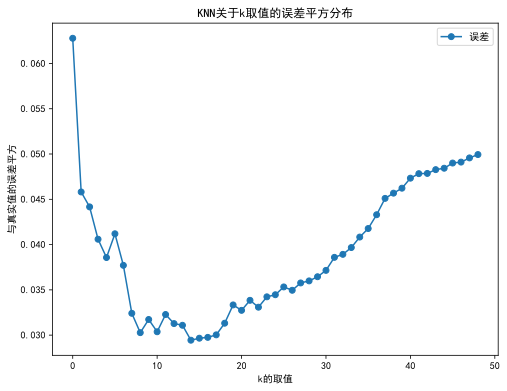

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

kmax = 50
y = np.asarray(Kfunc(kmax))
#x = np.linspace(2 ,kmax, kmax-1)
plt.figure(figsize =(8,6) ) 
plt.plot(y, 'o-', label='误差')
plt.title('KNN关于k取值的误差平方分布')
plt.xlabel('k的取值')
plt.ylabel('与真实值的误差平方')
plt.legend()
plt.show()